In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
iris = load_iris()

In [6]:
df = pd.DataFrame(np.c_[iris['data'],iris['target']], columns=['sepal_l','sepal_w','petal_l','petal_w', 'target'])

In [7]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
import seaborn as sns

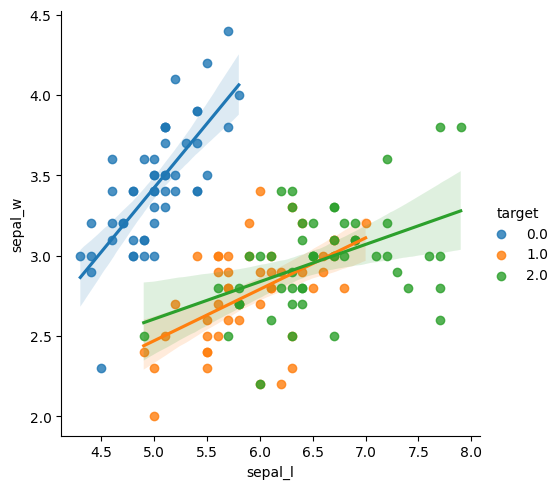

In [10]:
sns.lmplot(x='sepal_l',y='sepal_w',hue='target',data=df)

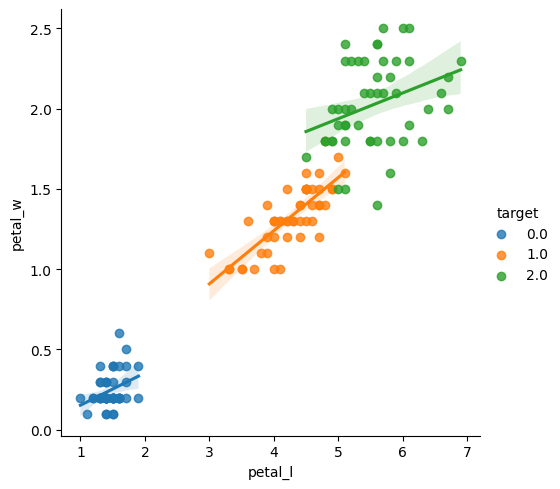

In [11]:
# compare the combinations of sepal l/w and petal l/w, identify which compbination yields the greatest separability
sns.lmplot(x='petal_l',y='petal_w',hue='target',data=df)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4],df['target'], test_size=0.2)

In [21]:
df.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
X_train.head()

,sepal_l,sepal_w,petal_l,petal_w
78,6.0,2.9,4.5,1.5
62,6.0,2.2,4.0,1.0
24,4.8,3.4,1.9,0.2
32,5.2,4.1,1.5,0.1
51,6.4,3.2,4.5,1.5


In [16]:
y_train.head()

78    1.0
62    1.0
24    0.0
32    0.0
51    1.0
Name: target, dtype: float64

In [18]:
y_test

61     1.0
37     0.0
30     0.0
139    2.0
115    2.0
96     1.0
120    2.0
145    2.0
102    2.0
21     0.0
114    2.0
68     1.0
22     0.0
26     0.0
59     1.0
57     1.0
122    2.0
116    2.0
104    2.0
108    2.0
76     1.0
19     0.0
56     1.0
95     1.0
42     0.0
148    2.0
137    2.0
144    2.0
113    2.0
103    2.0
Name: target, dtype: float64

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
pred = knn.predict(X_test)

In [30]:
X_test.head()

,sepal_l,sepal_w,petal_l,petal_w
61,5.9,3.0,4.2,1.5
37,4.9,3.6,1.4,0.1
30,4.8,3.1,1.6,0.2
139,6.9,3.1,5.4,2.1
115,6.4,3.2,5.3,2.3


In [28]:
pred

array([1., 0., 0., 2., 2., 1., 2., 2., 2., 0., 2., 1., 0., 0., 1., 1., 2.,
       2., 2., 2., 1., 0., 1., 1., 0., 2., 2., 2., 2., 2.])

In [29]:
np.array(y_test)

array([1., 0., 0., 2., 2., 1., 2., 2., 2., 0., 2., 1., 0., 0., 1., 1., 2.,
       2., 2., 2., 1., 0., 1., 1., 0., 2., 2., 2., 2., 2.])

In [31]:
accuracy_score(pred,y_test)

1.0

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4],df['target'], test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(pred,y_test))

0.9111111111111111


In [41]:
pred

array([0., 1., 2., 2., 2., 1., 2., 1., 0., 0., 2., 1., 0., 0., 1., 1., 2.,
       1., 0., 1., 1., 1., 2., 2., 1., 0., 1., 0., 2., 2., 2., 1., 0., 2.,
       2., 1., 1., 2., 2., 2., 0., 2., 0., 1., 2.])

In [42]:
np.array(y_test)

array([0., 2., 2., 2., 2., 2., 2., 1., 0., 0., 2., 1., 0., 0., 1., 1., 2.,
       1., 0., 1., 1., 1., 2., 2., 1., 0., 1., 0., 2., 2., 2., 1., 0., 1.,
       2., 1., 1., 2., 2., 2., 0., 2., 0., 1., 1.])

In [46]:
k_accuracy = []
for k in [3,5,7,13,25,38,49,71,91,100]:
    accuracy_scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4],df['target'], test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracy_scores.append(accuracy_score(pred,y_test))

    k_accuracy.append(np.mean(accuracy_scores))

In [47]:
results = pd.DataFrame(k_accuracy, index=[3,5,7,13,25,38,49,71,91,100])
results

,0
3,0.960000
5,0.973333
7,0.960000
13,0.966667
25,0.942222
38,0.928889
49,0.928889
71,0.646667
91,0.475556
100,0.364444
